<a href="https://colab.research.google.com/github/manishmcsa/Assigment-7/blob/main/Assigment_7_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Assigment6"

/content/drive/MyDrive/Assigment6


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from config import ModelConfig
from data_engine import DataEngine
from model_ass_7 import Net
from results import plot_misclassified_images, plot_graph
from train import train
from test import test
from utils import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 20,
  'num_workers': 4,
  'seed': 1}



Files already downloaded and verified
Files already downloaded and verified
 deer   car horse   dog


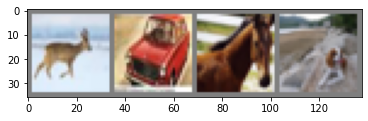

In [ ]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [ ]:
device = which_device()
model = Net(args).to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6770339012145996 Batch_id=781 Accuracy=47.17: 100%|██████████| 782/782 [04:23<00:00,  2.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0190, Accuracy: 5615/10000 (56.15%)

EPOCH: 2


Loss=1.1448293924331665 Batch_id=781 Accuracy=62.24: 100%|██████████| 782/782 [04:22<00:00,  2.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0150, Accuracy: 6650/10000 (66.50%)

EPOCH: 3


Loss=1.16143798828125 Batch_id=781 Accuracy=67.96: 100%|██████████| 782/782 [04:22<00:00,  2.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0135, Accuracy: 6982/10000 (69.82%)

EPOCH: 4


Loss=1.2761409282684326 Batch_id=781 Accuracy=71.15: 100%|██████████| 782/782 [04:21<00:00,  2.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0121, Accuracy: 7291/10000 (72.91%)

EPOCH: 5


Loss=0.7517001032829285 Batch_id=781 Accuracy=73.46: 100%|██████████| 782/782 [04:20<00:00,  3.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0112, Accuracy: 7486/10000 (74.86%)

EPOCH: 6


Loss=0.8144453763961792 Batch_id=781 Accuracy=75.55: 100%|██████████| 782/782 [04:18<00:00,  3.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0103, Accuracy: 7674/10000 (76.74%)

EPOCH: 7


Loss=0.5935455560684204 Batch_id=781 Accuracy=76.93: 100%|██████████| 782/782 [04:20<00:00,  3.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0100, Accuracy: 7793/10000 (77.93%)

EPOCH: 8


Loss=0.70577472448349 Batch_id=781 Accuracy=78.21: 100%|██████████| 782/782 [04:24<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 7880/10000 (78.80%)

EPOCH: 9


Loss=0.39628106355667114 Batch_id=781 Accuracy=79.29: 100%|██████████| 782/782 [04:23<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 7941/10000 (79.41%)

EPOCH: 10


Loss=0.7555297017097473 Batch_id=781 Accuracy=80.12: 100%|██████████| 782/782 [04:24<00:00,  2.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 7971/10000 (79.71%)

EPOCH: 11


Loss=0.48946380615234375 Batch_id=781 Accuracy=80.92: 100%|██████████| 782/782 [04:25<00:00,  2.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 8044/10000 (80.44%)

EPOCH: 12


Loss=0.48606953024864197 Batch_id=781 Accuracy=81.78: 100%|██████████| 782/782 [04:24<00:00,  2.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8071/10000 (80.71%)

EPOCH: 13


Loss=0.524553656578064 Batch_id=781 Accuracy=82.31: 100%|██████████| 782/782 [04:24<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 8098/10000 (80.98%)

EPOCH: 14


Loss=0.7555517554283142 Batch_id=781 Accuracy=82.94: 100%|██████████| 782/782 [04:24<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8178/10000 (81.78%)

EPOCH: 15


Loss=0.44539377093315125 Batch_id=781 Accuracy=83.31: 100%|██████████| 782/782 [04:23<00:00,  2.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8203/10000 (82.03%)

EPOCH: 16


Loss=1.2367057800292969 Batch_id=781 Accuracy=84.02: 100%|██████████| 782/782 [04:23<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8192/10000 (81.92%)

EPOCH: 17


Loss=0.39722585678100586 Batch_id=781 Accuracy=84.42: 100%|██████████| 782/782 [04:23<00:00,  2.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8278/10000 (82.78%)

EPOCH: 18


Loss=0.3936900198459625 Batch_id=781 Accuracy=85.07: 100%|██████████| 782/782 [04:23<00:00,  2.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 8269/10000 (82.69%)

EPOCH: 19


Loss=0.2713750898838043 Batch_id=781 Accuracy=85.16: 100%|██████████| 782/782 [04:23<00:00,  2.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8299/10000 (82.99%)

EPOCH: 20


Loss=1.1692395210266113 Batch_id=781 Accuracy=85.70: 100%|██████████| 782/782 [04:20<00:00,  3.00it/s]
/content/drive/My Drive/Assigment6/test.py:24: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]


Test set: Average loss: 0.0078, Accuracy: 8313/10000 (83.13%)



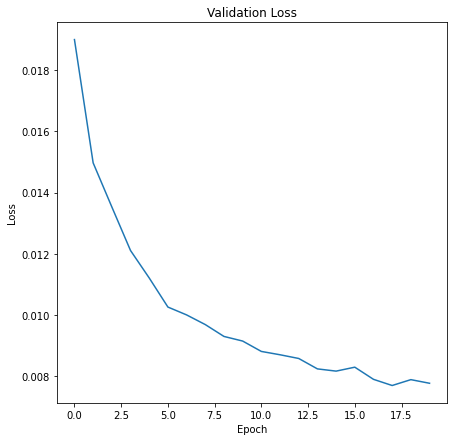

In [15]:
plot_graph(test_losses, "Loss")

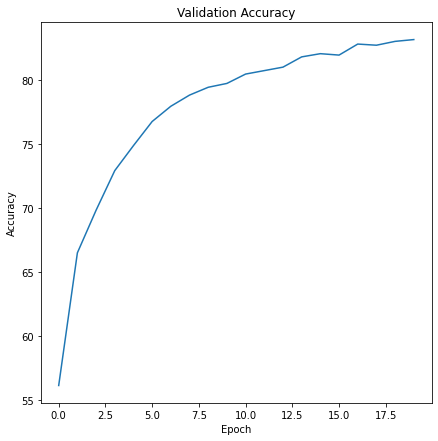

In [16]:
plot_graph(test_accs, "Accuracy")

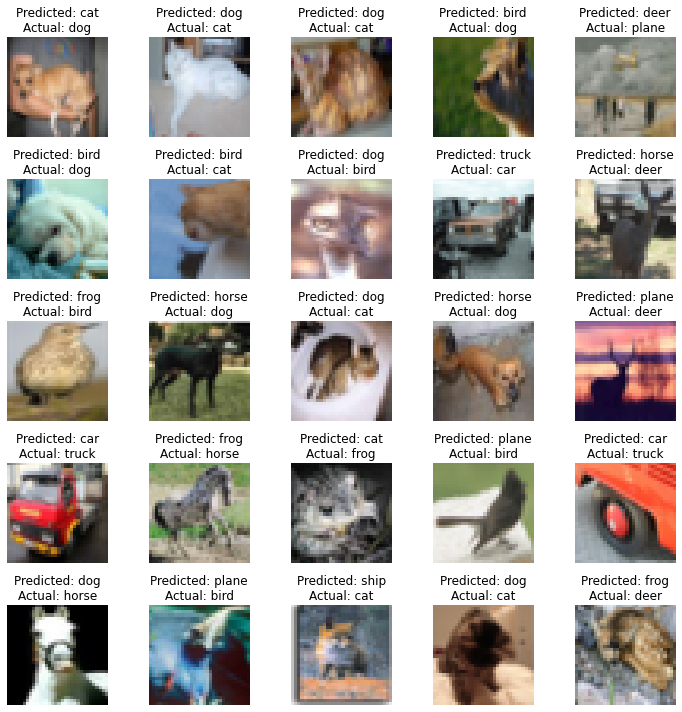

In [17]:
plot_misclassified_images(misclassified_imgs, data.classes, "misclassified_imgs.png")